<a href="https://colab.research.google.com/github/kavithasub/uh-study-modules/blob/main/data-science-project/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

# Project Title:
● Predict stage of lung cancer caused by smoking using machine learning models

# Objectives:
● Preprocess and analyze demographic and clinical data to identify key features
 related to lung cancer.

● Develop and compare machine learning models to predict the lung cancer stage.

● Evaluate model performance using accuracy, recall, F1-score and precision.

● Identify the most important features contributing to lung cancer by stage.

● Provide insights and recommendations for smoker lung cancer stage detection based on model findings.

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Cleaning and Preprocessing

**Read CSV**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/sample_data/lung_cancer.csv')
df.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [19]:
df.shape

(53427, 7)

In [6]:
df.describe()

,pid,age,days_to_cancer
count,53427.000000,53427.000000,2033.000000
mean,149778.048346,61.417448,1047.207083
std,44860.640458,5.023601,743.052899
min,100001.000000,43.000000,0.000000
25%,113363.500000,57.000000,398.000000
50%,126734.000000,60.000000,928.000000
75%,205491.500000,65.000000,1722.000000
max,218894.000000,79.000000,2618.000000


**Get value counts for each attributes**

In [7]:
## Get value counts for each attributes
def get_value_counts(dataframe,col_list):
    for col in col_list:
        print(dataframe[col].value_counts())
        print('\n')

In [11]:
get_value_counts(df, ['gender', 'smoker', 'race', 'stage_of_cancer'])

## Result shows value counts are not in other type

gender
Male      31517
Female    21910
Name: count, dtype: int64


smoker
Former     27680
Current    25747
Name: count, dtype: int64


race
White                                        48527
Black or African-American                     2375
Asian                                         1095
More than one race                             678
Native Hawaiian or Other Pacific Islander      192
American Indian or Alaskan Native              190
Participant refused to answer                  109
Name: count, dtype: int64


stage_of_cancer
IA      621
IV      596
IIIB    246
IIIA    213
IB      210
IIB      79
IIA      67
Name: count, dtype: int64




**Check NAN valued attributes**

In [13]:
df['stage_of_cancer'].unique()

array([nan, 'IA', 'IIB', 'IV', 'IIIB', 'IIIA', 'IIA', 'IB'], dtype=object)

In [14]:
df['race'].unique()

array(['White', 'Native Hawaiian or Other Pacific Islander',
       'More than one race', 'Asian', nan, 'Black or African-American',
       'American Indian or Alaskan Native',
       'Participant refused to answer'], dtype=object)

In [15]:
df['days_to_cancer'].unique()

array([  nan,  454., 2428., ..., 2220., 1077., 1632.])

**Replace NAN values**



In [17]:
df_lung_cancer = df.fillna({'stage_of_cancer':0, 'days_to_cancer':0, 'race':'Other'})
df_lung_cancer.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,0.0,0
1,100002,66,Male,White,Current,0.0,0
2,100003,64,Male,White,Current,0.0,0
3,100004,60,Male,White,Former,0.0,0
4,100005,64,Male,White,Former,0.0,0


**Convert categorical values of stage_of_cancer to 1,2,0**

In [21]:
pd.set_option('future.no_silent_downcasting', True)

In [22]:
df_lung_cancer['stage_of_cancer'] = df_lung_cancer['stage_of_cancer'].replace({'IA': 1, 'IB' : 1,'IIA':1,
                                                       'IIB':1,'IIIA':2,'IIIB':2,'IV':2})

# Exploratory Data Analysis

**Plot few graphs to understand interelations of attributes**

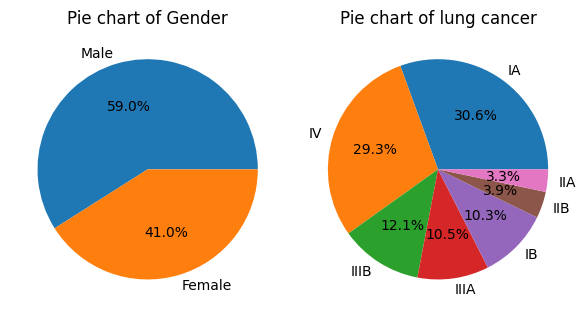

In [24]:
## Draw pie chart for gender and lung cancer distribution
fig,axes = plt.subplots(1,2,figsize=(6,6))
axes[0].pie(df_lung_cancer['gender'].value_counts(),labels=df_lung_cancer['gender'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Pie chart of Gender')
axes[1].pie(df['stage_of_cancer'].value_counts(),labels=df['stage_of_cancer'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Pie chart of lung cancer')
plt.tight_layout()
plt.show()

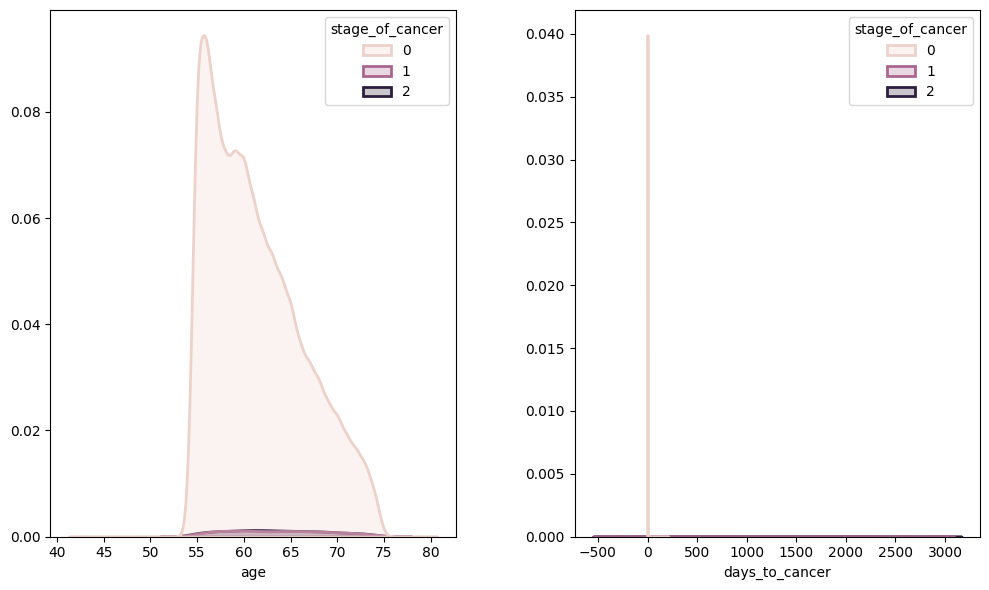

In [26]:
## More plots to see distributions
select_cols = ['stage_of_cancer', 'age', 'days_to_cancer']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax = ax.flatten()

for i, col in enumerate(df_lung_cancer[select_cols].columns[1:]):
    sns.kdeplot(x=col, data=df_lung_cancer, ax=ax[i], fill=True, lw=2, hue = 'stage_of_cancer')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()